In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/data2.csv')

In [3]:
cat_cols = [
    'heating', 'central_air', 'electrical', 'paved_drive', 'garage_finish', 'fence', 
    'bsmtfin_type_1',
    # added features that were among the numeric features, but they need to be converted to categorical features
    'bsmt_cond', 'fireplace_qu', 'garage_cond', 'pool_area']

In [4]:
data['bsmt_cond'] = ['5' if a==5 else '4' if a==4 else '3' if a==3 else '2' if a==2 else '1' if a==1 else 'no_basement' for a in data['bsmt_cond']]

In [5]:
data['fireplace_qu'] = ['5' if a==5 else '4' if a==4 else '3' if a==3 else '2' if a==2 else '1' if a==1 else 'no_fireplace' for a in data['fireplace_qu']]

In [6]:
data['garage_qual'] = ['5' if a==5 else '4' if a==4 else '3' if a==3 else '2' if a==2 else '1' if a==1 else 'no_garage' for a in data['garage_qual']]

In [7]:
data['garage_cond'] = ['5' if a==5 else '4' if a==4 else '3' if a==3 else '2' if a==2 else '1' if a==1 else 'no_garage' for a in data['garage_cond']]

In [8]:
data['pool_area'] = ['no_pool' if a==0 else 'pool' for a in data['pool_area']]

In [9]:
data_cat = data[cat_cols]

In [10]:
data_cat.isnull().sum()

heating           0
central_air       0
electrical        0
paved_drive       0
garage_finish     0
fence             0
bsmtfin_type_1    0
bsmt_cond         0
fireplace_qu      0
garage_cond       0
pool_area         0
dtype: int64

In [11]:
num_cols = [
    'overall_qual', 'overall_cond', 'year_remod/add', 'exter_qual', 'exter_cond', 'kitchen_qual', 'full_bath',
    'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'wood_deck_sf',
    'heating_qc', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']

In [12]:
data_num = data[num_cols]

In [13]:
data = pd.concat([data_cat, data_num, data['saleprice']], axis=1)

In [14]:
data.head()

,heating,central_air,electrical,paved_drive,garage_finish,fence,bsmtfin_type_1,bsmt_cond,fireplace_qu,garage_cond,...,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,wood_deck_sf,heating_qc,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath,saleprice
0,GasA,Y,SBrkr,Y,RFn,no_fence,GLQ,3,no_fireplace,3,...,3,1,6,0,0,5,725.0,0.0,0.0,130500
1,GasA,Y,SBrkr,Y,RFn,no_fence,GLQ,3,3,3,...,4,1,8,1,0,5,913.0,1.0,0.0,220000
2,GasA,Y,SBrkr,Y,Unf,no_fence,GLQ,3,no_fireplace,3,...,3,1,5,0,0,3,1057.0,1.0,0.0,109000
3,GasA,Y,SBrkr,Y,Fin,no_fence,Unf,3,no_fireplace,3,...,3,1,7,0,100,4,384.0,0.0,0.0,174000
4,GasA,Y,SBrkr,N,Unf,no_fence,Unf,4,no_fireplace,3,...,3,1,6,0,0,3,676.0,0.0,0.0,138500


---

**Central A/C**

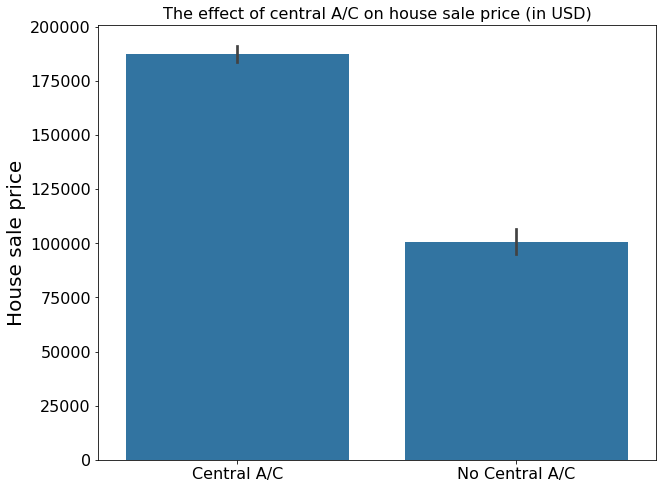

In [15]:
AC = data['central_air'].map({'Y' : 'Central A/C', 'N' : 'No Central A/C'})

plt.figure(figsize=(10,8))
sns.barplot(x=AC, y=data['saleprice'], ci=95, color='tab:blue');
plt.xticks(color='black', fontsize=16);
plt.yticks(color='black', fontsize=16);
plt.xlabel('');
plt.ylabel('House sale price', size=20);
plt.title('The effect of central A/C on house sale price (in USD)', size=16);
plt.savefig('../images/ac.jpeg')

**Heating**

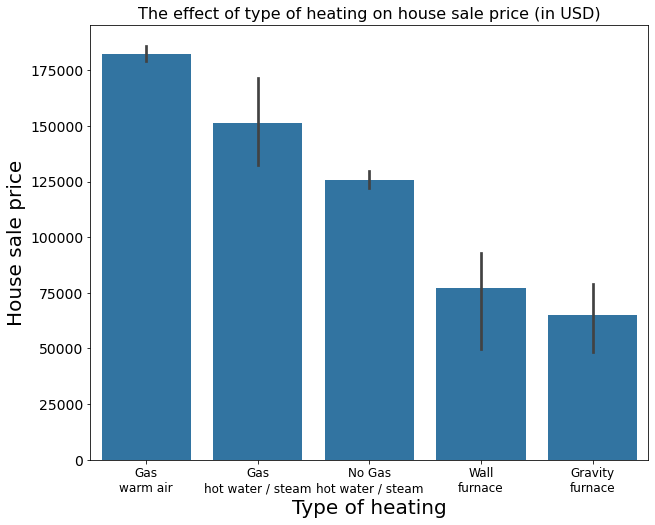

In [16]:
heating = data['heating'].map({'GasA' : 'Gas\nwarm air', 'GasW' : 'Gas\nhot water / steam', 
                               'Grav' : 'Gravity\nfurnace', 'Wall' : 'Wall\nfurnace', 
                               'OthW' : 'No Gas\nhot water / steam'})

plt.figure(figsize=(10,8))
sns.barplot(x=heating, y=data['saleprice'], ci=95, order=['Gas\nwarm air',
                                                         'Gas\nhot water / steam',
                                                         'No Gas\nhot water / steam',
                                                         'Wall\nfurnace',
                                                         'Gravity\nfurnace'], color='tab:blue');
plt.xticks(color='black', fontsize=12);
plt.yticks(color='black', fontsize=14);
plt.xlabel('Type of heating', size=20);
plt.ylabel('House sale price', size=20);
plt.title('The effect of type of heating on house sale price (in USD)', size=16);
plt.savefig('../images/heating.jpeg')

**Electrical**

In [17]:
data['electrical'].value_counts()

SBrkr    1854
FuseA     137
FuseF      35
FuseP       7
Name: electrical, dtype: int64

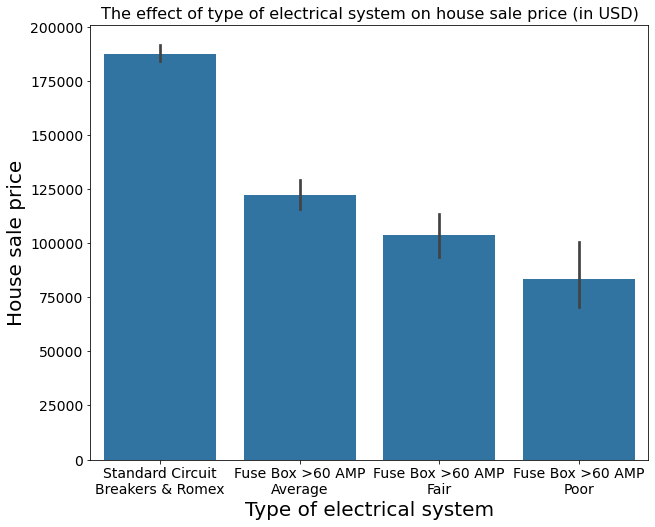

In [18]:
electrical = data['electrical'].map({'SBrkr' : 'Standard Circuit\nBreakers & Romex', 
                                  'FuseA' : 'Fuse Box >60 AMP\nAverage', 
                                  'FuseF' : 'Fuse Box >60 AMP\nFair', 
                                  'FuseP' : 'Fuse Box >60 AMP\nPoor'})

plt.figure(figsize=(10,8))
sns.barplot(x=electrical, y=data['saleprice'], ci=95, order=['Standard Circuit\nBreakers & Romex',
                                                           'Fuse Box >60 AMP\nAverage',
                                                           'Fuse Box >60 AMP\nFair',
                                                           'Fuse Box >60 AMP\nPoor'], color='tab:blue');
plt.xticks(color='black', fontsize=14);
plt.yticks(color='black', fontsize=14);
plt.xlabel('Type of electrical system', size=20);
plt.ylabel('House sale price', size=20);
plt.title('The effect of type of electrical system on house sale price (in USD)', size=16);
plt.savefig('../images/electrical.jpeg')

**Pool**

In [19]:
data['pool_area'].value_counts()

no_pool    2026
pool          7
Name: pool_area, dtype: int64

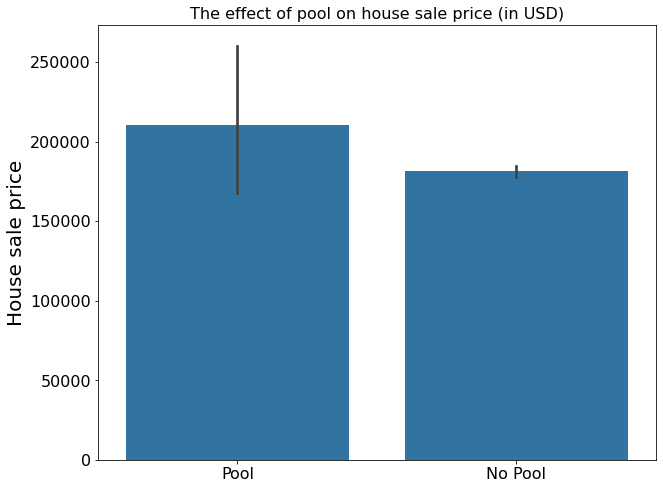

In [20]:
pool = data['pool_area'].map({'pool' : 'Pool', 'no_pool' : 'No Pool'})

plt.figure(figsize=(10,8))
sns.barplot(x=pool, y=data['saleprice'], ci=95, order=['Pool', 'No Pool'], color='tab:blue');
plt.xticks(color='black', fontsize=16);
plt.yticks(color='black', fontsize=16);
plt.xlabel('');
plt.ylabel('House sale price', size=20);
plt.title('The effect of pool on house sale price (in USD)', size=16);
plt.savefig('../images/pool.jpeg')

**Basement Condition**

In [21]:
data['bsmt_cond'].value_counts()

3              1824
4                85
2                64
no_basement      53
1                 4
5                 3
Name: bsmt_cond, dtype: int64

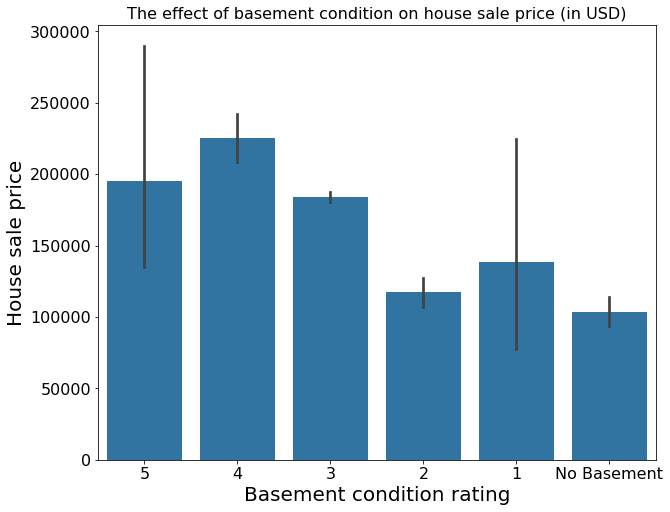

In [22]:
bsmt_cond = data['bsmt_cond'].map({'no_basement' : 'No Basement', '5' : '5',
                                  '4' : '4', '3' : '3', '2' : '2', '1' : '1'})

plt.figure(figsize=(10,8))
sns.barplot(x=bsmt_cond, y=data['saleprice'], ci=95, order=['5', '4', '3', '2', '1', 'No Basement'], color='tab:blue');
plt.xticks(color='black', fontsize=16);
plt.yticks(color='black', fontsize=16);
plt.xlabel('Basement condition rating', size=20);
plt.ylabel('House sale price', size=20);
plt.title('The effect of basement condition on house sale price (in USD)', size=16);
plt.savefig('../images/bsmt_cond.jpeg')

**Overall Quality**

In [23]:
data['overall_qual'].value_counts()

5     558
6     504
7     428
8     248
4     156
9      76
3      29
10     21
2       9
1       4
Name: overall_qual, dtype: int64

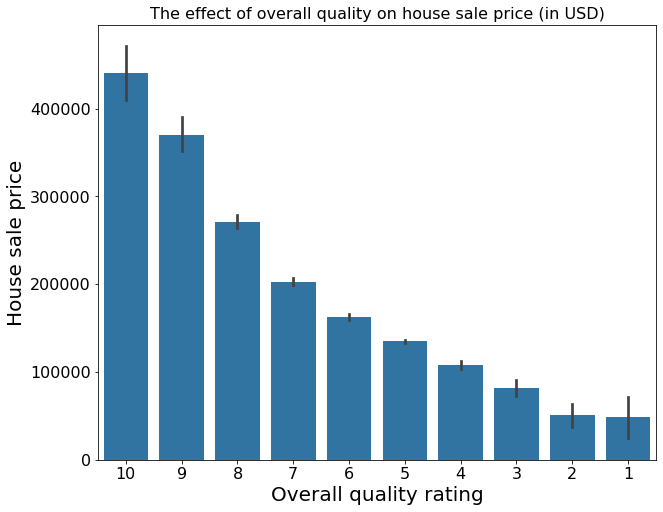

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['overall_qual'], y=data['saleprice'], ci=95, order=[10,9,8,7,6,5,4,3,2,1], color='tab:blue');
plt.xticks(color='black', fontsize=16);
plt.yticks(color='black', fontsize=16);
plt.xlabel('Overall quality rating', size=20);
plt.ylabel('House sale price', size=20);
plt.title('The effect of overall quality on house sale price (in USD)', size=16);
plt.savefig('../images/overall_quality.jpeg')

**External Quality**

In [25]:
data['exter_qual'].value_counts()

3    1236
4     693
5      79
2      25
Name: exter_qual, dtype: int64

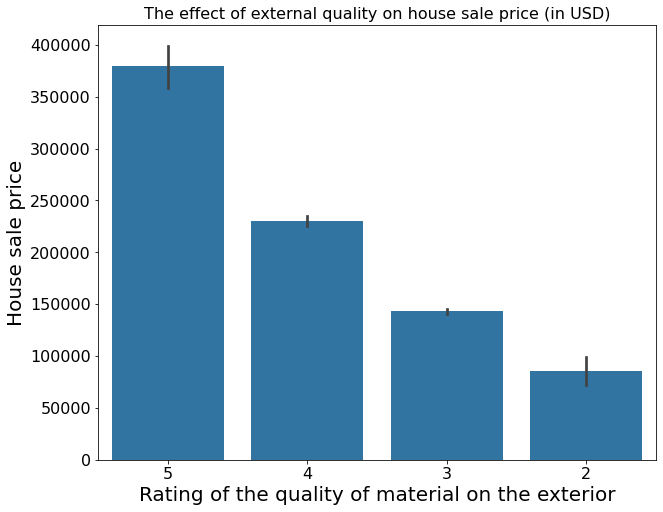

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['exter_qual'], y=data['saleprice'], ci=95, order=[5,4,3,2], color='tab:blue');
plt.xticks(color='black', fontsize=16);
plt.yticks(color='black', fontsize=16);
plt.xlabel('Rating of the quality of material on the exterior', size=20);
plt.ylabel('House sale price', size=20);
plt.title('The effect of external quality on house sale price (in USD)', size=16);
plt.savefig('../images/external_quality.jpeg')

**Kitchen Quality**

In [27]:
data['kitchen_qual'].value_counts()

3    1037
4     803
5     147
2      46
Name: kitchen_qual, dtype: int64

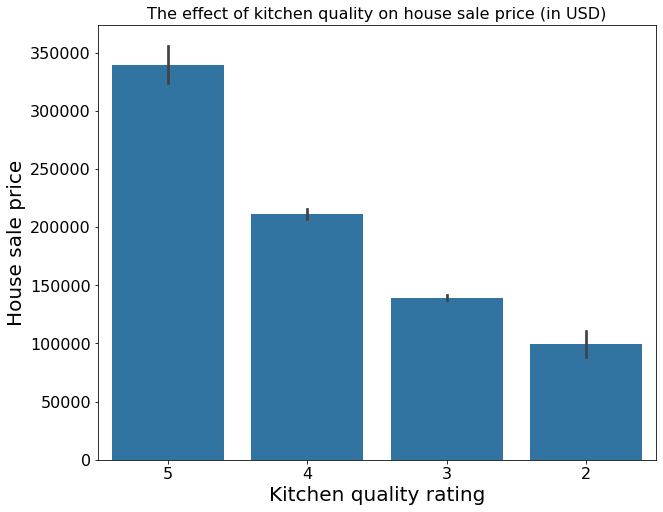

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['kitchen_qual'], y=data['saleprice'], ci=95, order=[5,4,3,2], color='tab:blue');
plt.xticks(color='black', fontsize=16);
plt.yticks(color='black', fontsize=16);
plt.xlabel('Kitchen quality rating', size=20);
plt.ylabel('House sale price', size=20);
plt.title('The effect of kitchen quality on house sale price (in USD)', size=16);
plt.savefig('../images/kitchen_quality.jpeg')

**Total Number of Rooms Above Ground Level**

In [29]:
data['totrms_abvgrd'].value_counts()

6     594
7     475
5     402
8     226
4     145
9      97
10     49
11     20
12     12
3      11
2       1
13      1
Name: totrms_abvgrd, dtype: int64

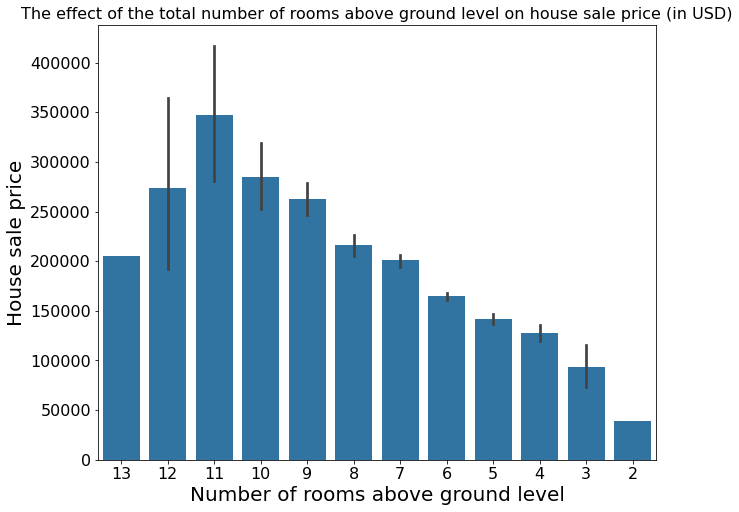

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['totrms_abvgrd'], y=data['saleprice'], ci=95, order=[13,12,11,10,9,8,7,6,5,4,3,2], color='tab:blue');
plt.xticks(color='black', fontsize=16);
plt.yticks(color='black', fontsize=16);
plt.xlabel('Number of rooms above ground level', size=20);
plt.ylabel('House sale price', size=20);
plt.title('The effect of the total number of rooms above ground level on house sale price (in USD)', size=16);
plt.savefig('../images/totrms_abvgrd.jpeg')

**Number of fireplaces**

In [31]:
data['fireplaces'].value_counts()

0    992
1    895
2    141
3      5
Name: fireplaces, dtype: int64

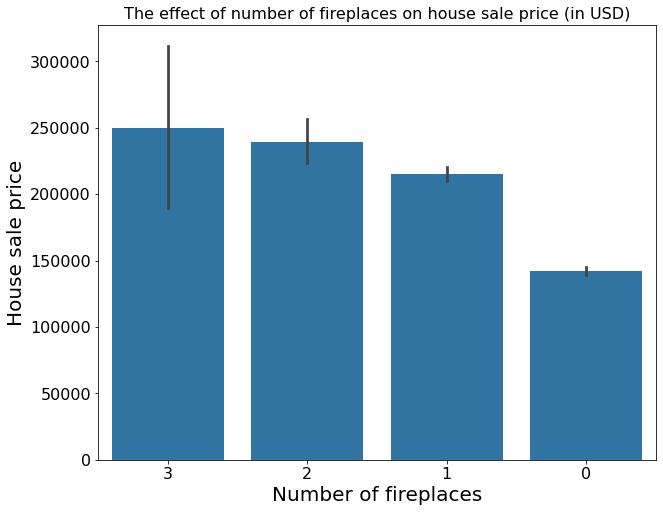

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['fireplaces'], y=data['saleprice'], ci=95, order=[3,2,1,0], color='tab:blue');
plt.xticks(color='black', fontsize=16);
plt.yticks(color='black', fontsize=16);
plt.xlabel('Number of fireplaces', size=20);
plt.ylabel('House sale price', size=20);
plt.title('The effect of number of fireplaces on house sale price (in USD)', size=16);
plt.savefig('../images/fireplaces.jpeg')

**Total Basement Square footage**

In [33]:
data['total_bsmt_sf'].value_counts()

0.0       53
864.0     51
672.0     20
1040.0    20
816.0     17
          ..
1649.0     1
516.0      1
954.0      1
2153.0     1
485.0      1
Name: total_bsmt_sf, Length: 881, dtype: int64

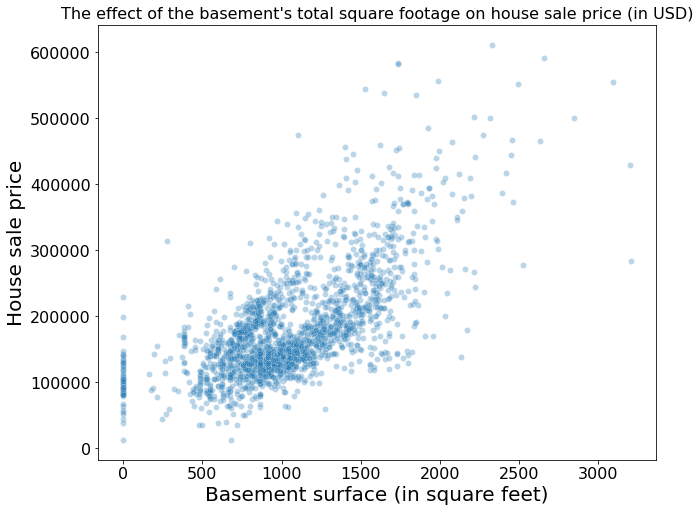

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['total_bsmt_sf'], y=data['saleprice'], alpha=.3, sizes=20);
plt.xticks(color='black', fontsize=16);
plt.yticks(color='black', fontsize=16);
plt.xlabel('Basement surface (in square feet)', size=20);
plt.ylabel('House sale price', size=20);
plt.title('The effect of the basement\'s total square footage on house sale price (in USD)', size=16);
plt.savefig('../images/total_bsmt_sf.jpeg')

---